In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

df = pd.read_csv("train.csv")

df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [2]:
df['lot_size_units'] = df.apply(lambda row: row['lot_size'] * 43560 if row['lot_size_units'] == 'acre' else row['lot_size'], axis=1)

In [3]:
# convert size_units column to numeric
def convert_size_units(x):
    if x == 'sqft':
        return 1.0
    elif x == 'acre':
        return 43560.0 # 1 acre = 43,560 square feet
    else:
        return float('nan')

df['size_units'] = df['size_units'].map(convert_size_units)

In [4]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [5]:
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,1.0,6000.00,6000.0,98144,795000.0
1,4,2.0,2240.0,1.0,0.31,13503.6,98106,915000.0
2,4,3.0,2040.0,1.0,3783.00,3783.0,98107,950000.0
3,4,3.0,3800.0,1.0,5175.00,5175.0,98199,1950000.0
5,2,2.0,1190.0,1.0,1.00,43560.0,98107,740000.0


In [6]:
df.shape

(1660, 8)

In [7]:
#check for categorical variables
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 0
Float variables: 6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1660 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            1660 non-null   int64  
 1   baths           1660 non-null   float64
 2   size            1660 non-null   float64
 3   size_units      1660 non-null   float64
 4   lot_size        1660 non-null   float64
 5   lot_size_units  1660 non-null   float64
 6   zip_code        1660 non-null   int64  
 7   price           1660 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 116.7 KB


In [10]:
df.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [11]:
#EDA Analysis 
#correlation independednt and dependent features
#check for multi corr
df.corr()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
beds,1.000000,0.593118,0.725982,NaN,0.286267,-0.069909,0.051972,0.234021
baths,0.593118,1.000000,0.620012,NaN,0.013293,-0.048328,-0.042707,0.271710
size,0.725982,0.620012,1.000000,NaN,0.268075,-0.060761,0.052203,0.402903
size_units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_size,0.286267,0.013293,0.268075,NaN,1.000000,-0.062405,0.173726,0.091087
lot_size_units,-0.069909,-0.048328,-0.060761,NaN,-0.062405,1.000000,-0.027353,-0.029150
zip_code,0.051972,-0.042707,0.052203,NaN,0.173726,-0.027353,1.000000,-0.062098
price,0.234021,0.271710,0.402903,NaN,0.091087,-0.029150,-0.062098,1.000000


D:\Program Files\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

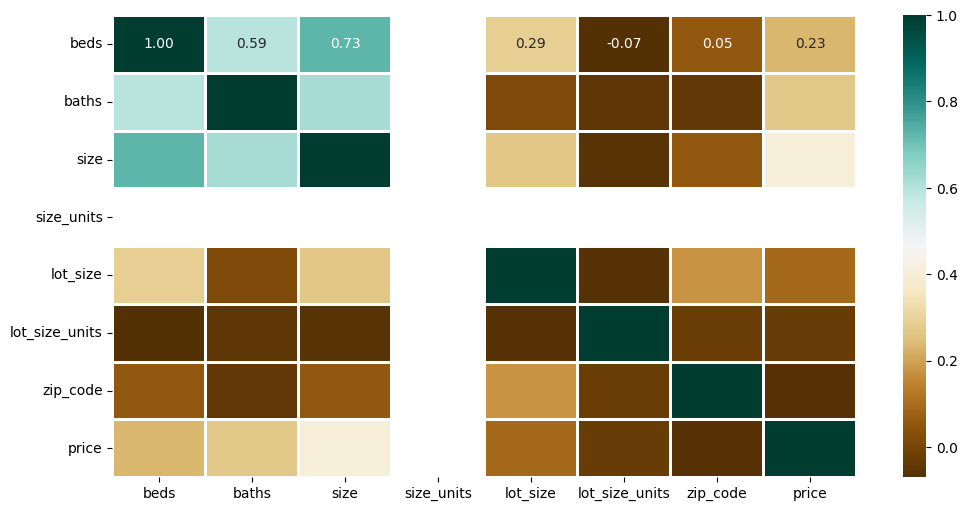

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)

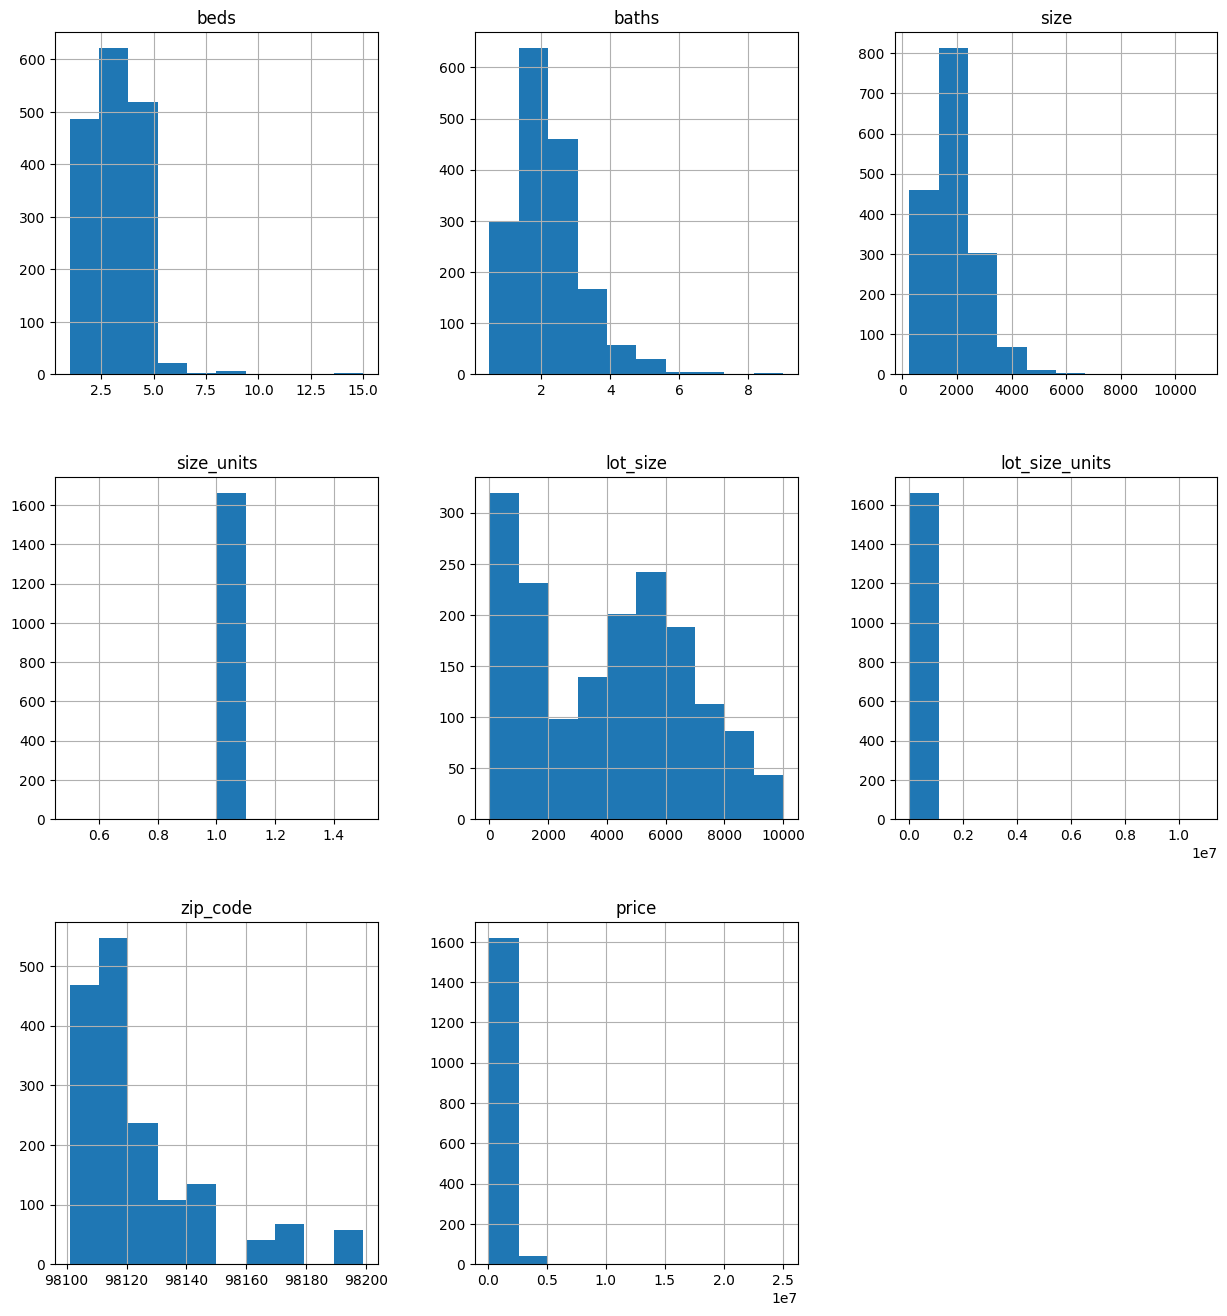

In [13]:
#hist will plot for all 
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(15,16))
plt.show()

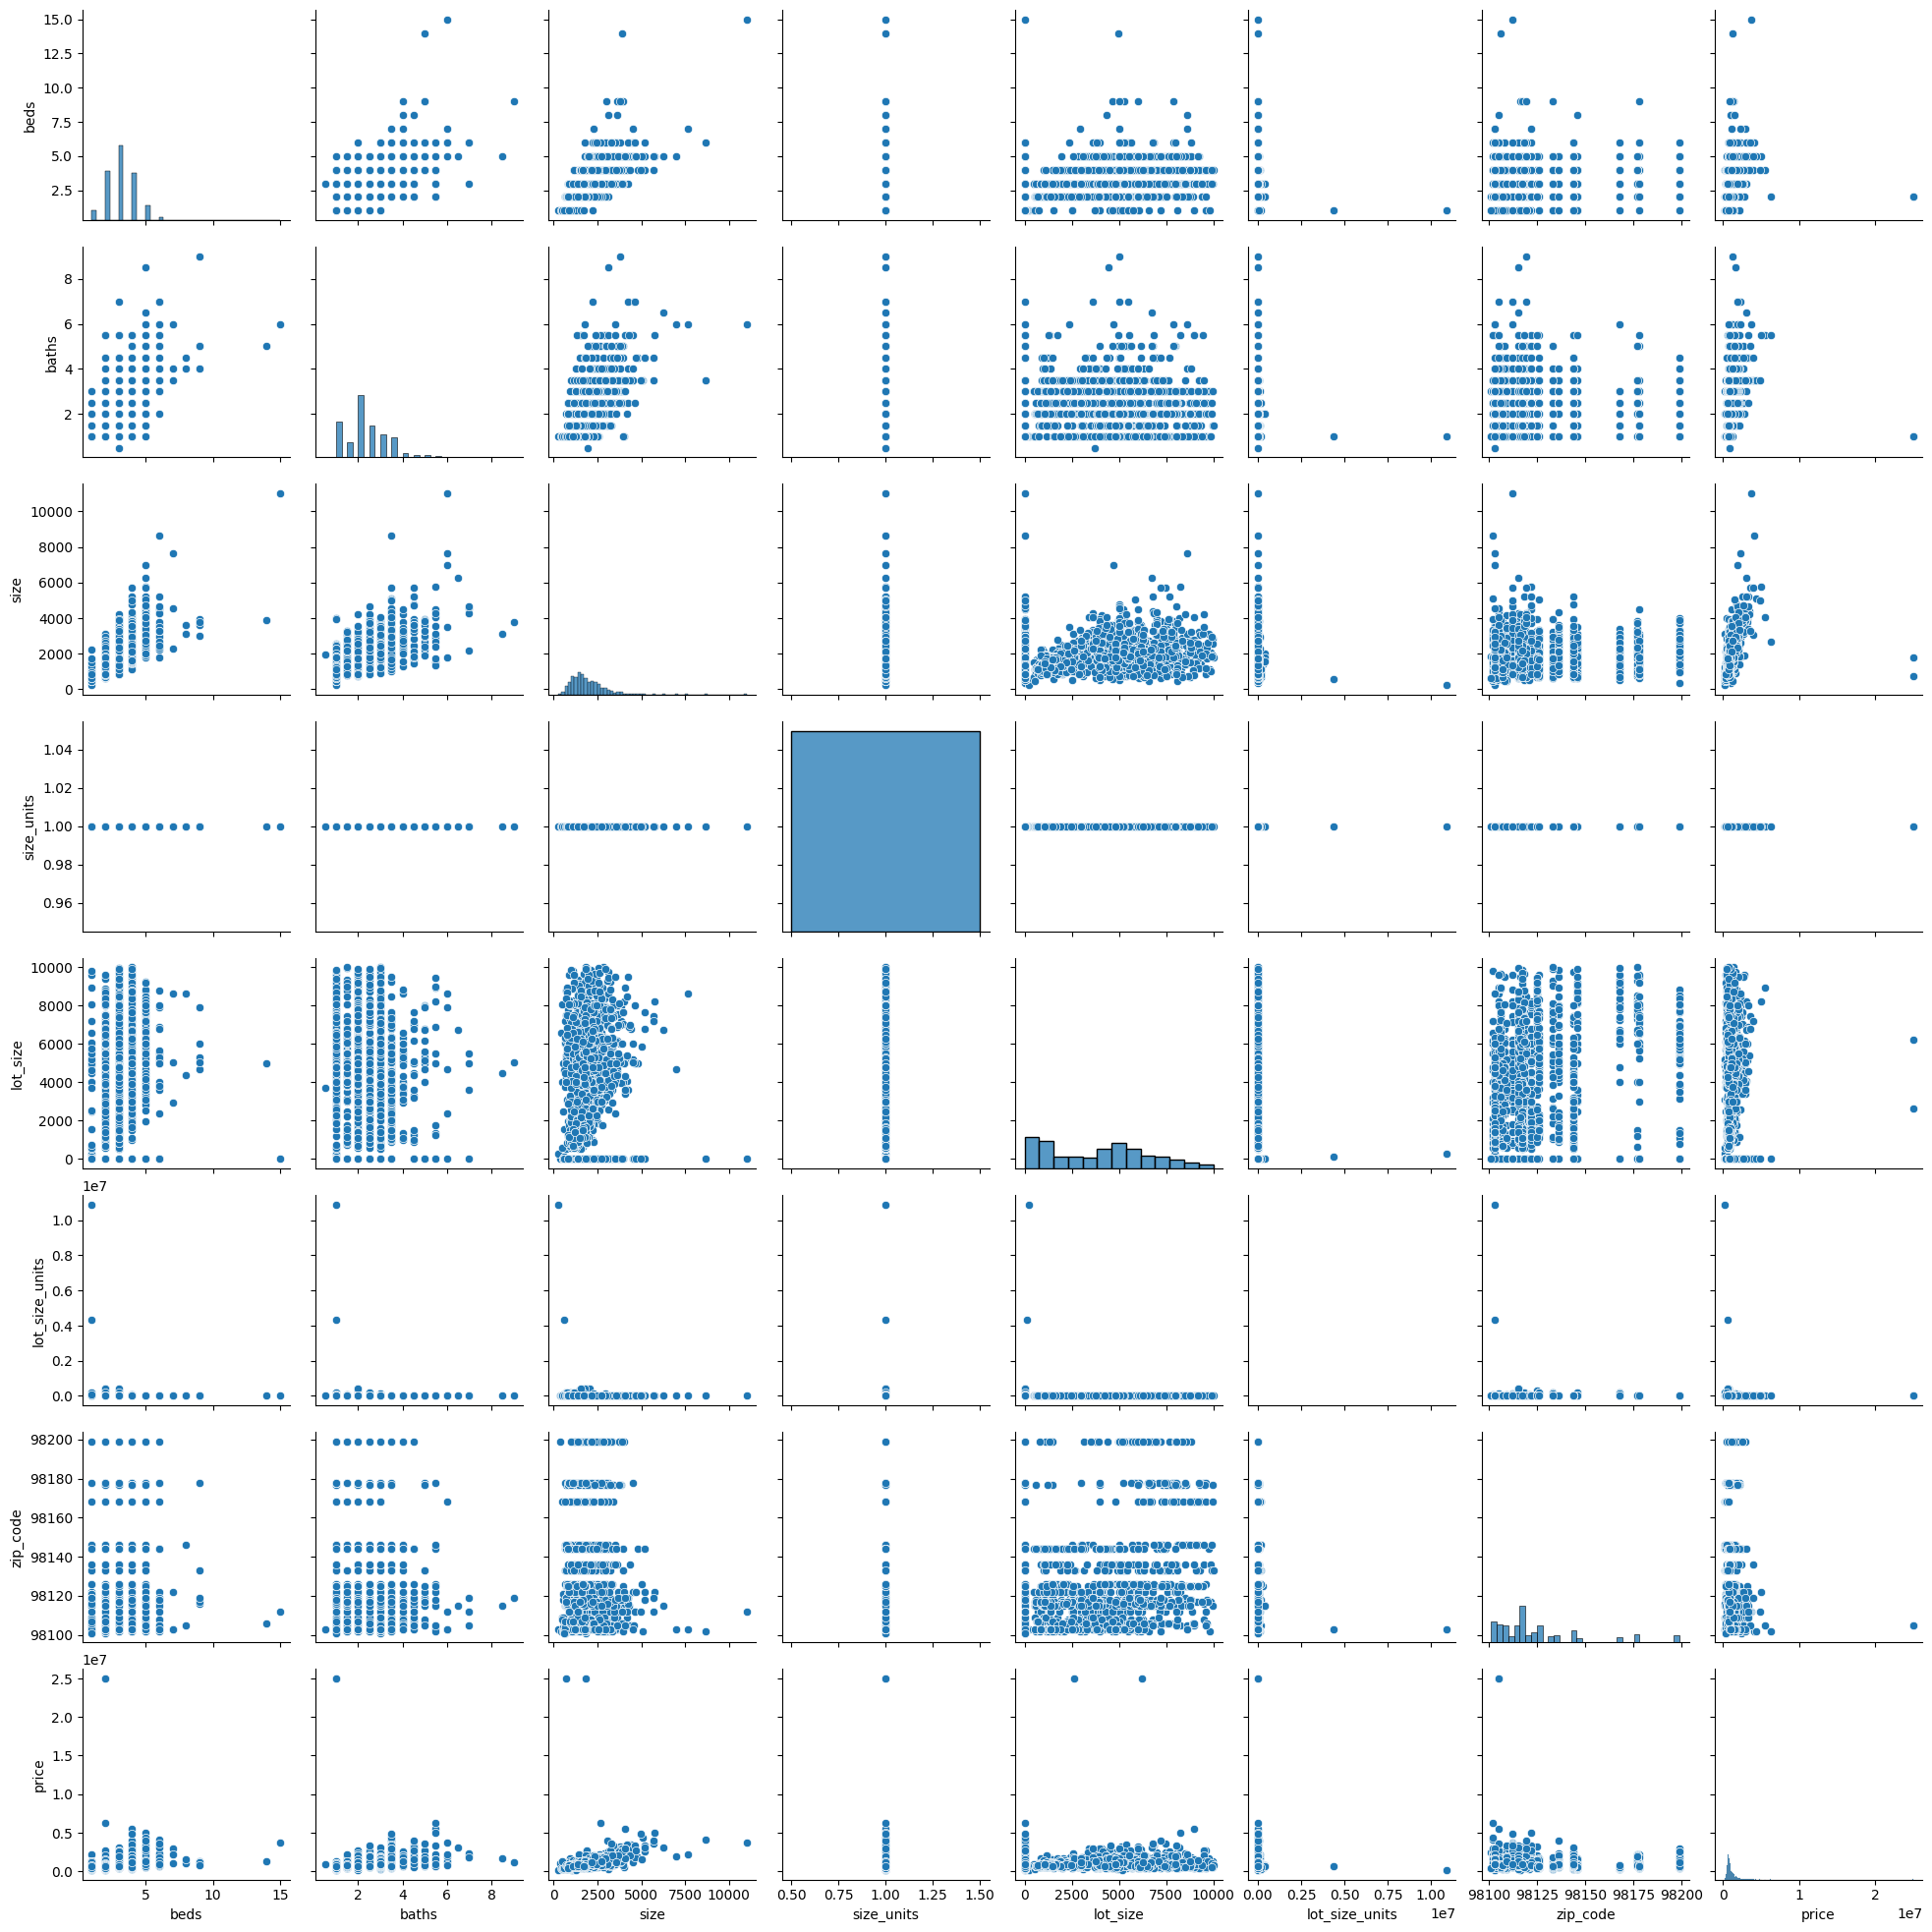

In [14]:
import seaborn as sns
sns.pairplot(df)

<Axes: xlabel='size', ylabel='price'>

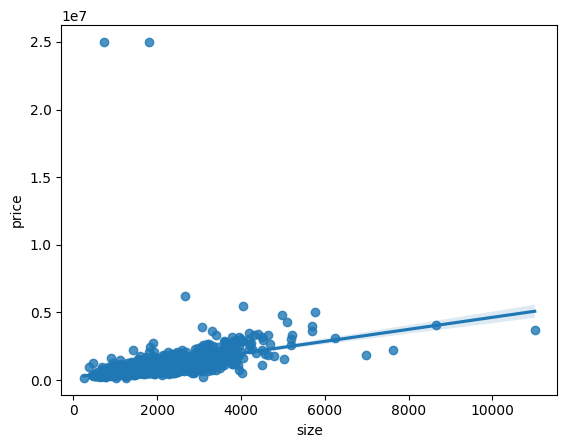

In [15]:
import seaborn as sns
sns.regplot(x='size',y='price',data=df)

In [16]:
#prepare independent and dependent features dividing
X = df.iloc[:, :-1] # select all columns except the last one (price)

# select the target variable using iloc
Y = df.iloc[:, -1] 

In [17]:
df['size_units']

0       1.0
1       1.0
2       1.0
3       1.0
5       1.0
       ... 
2009    1.0
2010    1.0
2011    1.0
2013    1.0
2015    1.0
Name: size_units, Length: 1660, dtype: float64

In [18]:
X.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code
0,3,2.5,2590.0,1.0,6000.00,6000.0,98144
1,4,2.0,2240.0,1.0,0.31,13503.6,98106
2,4,3.0,2040.0,1.0,3783.00,3783.0,98107
3,4,3.0,3800.0,1.0,5175.00,5175.0,98199
5,2,2.0,1190.0,1.0,1.00,43560.0,98107


In [19]:
Y.head()

0     795000.0
1     915000.0
2     950000.0
3    1950000.0
5     740000.0
Name: price, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [21]:
model.fit(X,Y)

LinearRegression()

In [22]:
new_house = [[3, 2.5, 2590.0, 1.0,6000.00, 6000.0, 98144]]
predicted_price = model.predict(new_house)

print("Predicted price:", predicted_price[0])

Predicted price: 1371588.494463563


C:\Users\SRIHARI\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
print(model.coef_)

[-1.23704698e+05  6.44227762e+04  5.14482081e+02 -2.53521648e-11
  7.44321061e+00 -3.06712038e-02 -3.52218283e+03]


In [24]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# fit a linear regression model on the training set
reg = LinearRegression()
reg.fit(X_train, Y_train)

# evaluate the model's performance on the testing set using R^2
Y_pred = reg.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print('R^2 score:', r2)

R^2 score: 0.5818030219661484


In [25]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 396620.6593338261


C:\Users\SRIHARI\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
